In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [26]:
#Get your correct path
data_path = 'C:\\Users\\Wes\\Desktop\\Machine Learning\\project'
val_path = data_path+'\\val\\'
train_path = data_path+'\\train\\'

In [27]:
print(os.listdir(val_path))
print(os.listdir(train_path))

['Parasitized', 'Uninfected']
['Parasitized', 'Uninfected']


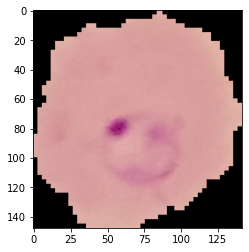

In [28]:
p_cell = train_path+'\\Parasitized\\'+os.listdir(train_path+'\\Parasitized')[0]
p_cell_im = imread(p_cell)
plt.imshow(p_cell_im)

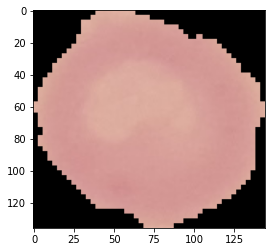

In [29]:
n_cell = train_path+'\\Uninfected\\'+os.listdir(train_path+'\\Uninfected')[0]
n_cell_im = imread(n_cell)
plt.imshow(n_cell_im)

In [30]:
print(p_cell_im.shape)
print(n_cell_im.shape)

(148, 142, 3)
(136, 145, 3)


In [31]:
shapes1 = []
shapes2 = []
for image_filename in os.listdir(val_path+'\\Uninfected'):
    
    img = imread(val_path+'\\Uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    shapes1.append(d1)
    shapes2.append(d2)

C:\Users\Wes\Anaconda37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


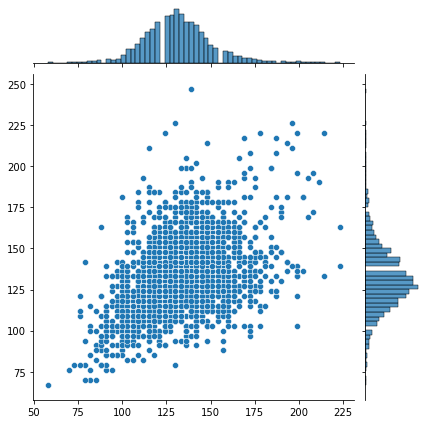

In [32]:
sns.jointplot(shapes1,shapes2)

In [33]:
print(np.mean(shapes1))
print(np.mean(shapes2))

131.72075471698113
131.4934687953556


In [34]:
im_shape = (131,131,3)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import load_model


In [35]:
idg = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.15, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

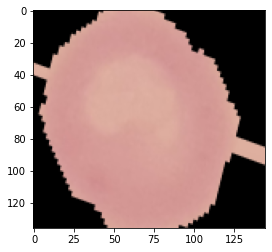

In [36]:
plt.imshow(idg.random_transform(n_cell_im))

In [37]:
model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=im_shape, activation='relu',))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=im_shape, activation='relu',))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=im_shape, activation='relu',))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(96))
model1.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model1.add(Dropout(0.2))

# Last layer, remember its binary so we use sigmoid
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [38]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)
batch_size = 8

In [39]:
training_idg = idg.flow_from_directory(train_path, target_size=im_shape[:2], color_mode='rgb', batch_size=batch_size,
                                               class_mode='binary')

validation_idg = idg.flow_from_directory(val_path, target_size=im_shape[:2], color_mode='rgb', batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 20668 images belonging to 2 classes.
Found 6890 images belonging to 2 classes.


In [40]:
results1 = model1.fit(training_idg,epochs=10,
                              validation_data=validation_idg,
                             callbacks=[early_stopping])

C:\Users\Wes\Anaconda37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2584/2584 [==============================] - 428s 165ms/step - loss: 0.4683 - accuracy: 0.7714 - val_loss: 0.1953 - val_accuracy: 0.9372
Epoch 2/10
2584/2584 [==============================] - 423s 164ms/step - loss: 0.1900 - accuracy: 0.9401 - val_loss: 0.1739 - val_accuracy: 0.9443
Epoch 3/10
2584/2584 [==============================] - 424s 164ms/step - loss: 0.1920 - accuracy: 0.9373 - val_loss: 0.1556 - val_accuracy: 0.9495
Epoch 4/10
2584/2584 [==============================] - 423s 164ms/step - loss: 0.1672 - accuracy: 0.9476 - val_loss: 0.1611 - val_accuracy: 0.9470
Epoch 5/10
2584/2584 [==============================] - 434s 168ms/step - loss: 0.1754 - accuracy: 0.9429 - val_loss: 0.1550 - val_accuracy: 0.9479
Epoch 6/10
2584/2584 [==============================] - 423s 164ms/step - loss: 0.1636 - accuracy: 0.9492 - val_loss: 0.1591 - val_accuracy: 0.9499
Epoch 7/10
2584/2584 [==============================] - 424s 164ms/step - loss: 0.1745 - accuracy: 0.9451 - val_

In [41]:
dfloss = pd.DataFrame(model1.history.history)

<AxesSubplot:>

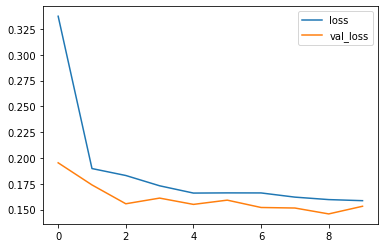

In [42]:
dfloss[['loss','val_loss']].plot()

In [43]:
model1.save('Cell_CNN.h5')

In [44]:
print('Loss and Accuracy')
print(model1.evaluate(validation_idg))

Loss and Accuracy
862/862 [==============================] - 65s 76ms/step - loss: 0.1542 - accuracy: 0.9493
[0.15424701571464539, 0.9493468999862671]


In [46]:
Predictions = model1.predict(validation_idg)
Good_Predictions = Predictions > 0.9

<AxesSubplot:>

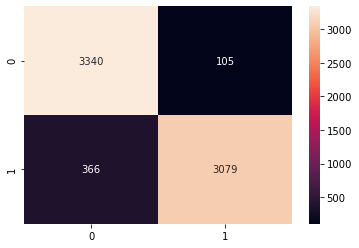

In [47]:
cm = confusion_matrix(validation_idg.classes,Good_Predictions)
sns.heatmap(cm,annot=True,fmt='d')

In [48]:
print(classification_report(validation_idg.classes,Good_Predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3445
           1       0.97      0.89      0.93      3445

    accuracy                           0.93      6890
   macro avg       0.93      0.93      0.93      6890
weighted avg       0.93      0.93      0.93      6890

